In [5]:
import pandas as pd

# Load the data from the provided CSV files
interest_rate_df = pd.read_csv('../data/processed/Bank_of_Canada_interest_rate_1980_2024_.csv')
housing_price_index_df = pd.read_csv('../data/processed/Housing_Price_Index_1981_2024.csv')

# Display the first few rows of each dataframe to understand their structure
interest_rate_df.head(), housing_price_index_df.head()


(  Month-Year  Overnight money market financing
 0    1980-01                         13.270833
 1    1980-02                         11.982759
 2    1980-03                         11.427419
 3    1980-04                         15.841667
 4    1980-05                         17.052419,
   Month-Year  Alberta  British Columbia  Calgary, Alberta  Canada  \
 0    1981-01      NaN               NaN              27.8    36.1   
 1    1981-02      NaN               NaN              28.1    36.5   
 2    1981-03      NaN               NaN              28.6    37.3   
 3    1981-04      NaN               NaN              30.1    38.1   
 4    1981-05      NaN               NaN              30.1    38.9   
 
    Charlottetown, Prince Edward Island  Edmonton, Alberta  Gatineau, Quebec  \
 0                                  NaN               36.5               NaN   
 1                                  NaN               36.8               NaN   
 2                                  NaN          

In [6]:
# Merge the datasets on the 'Month-Year' column
merged_df = pd.merge(interest_rate_df, housing_price_index_df, on='Month-Year')

# Display the first few rows of the merged dataframe
merged_df.head()


,Month-Year,Overnight money market financing,Alberta,British Columbia,"Calgary, Alberta",Canada,"Charlottetown, Prince Edward Island","Edmonton, Alberta","Gatineau, Quebec","Greater Sudbury, Ontario",...,"Saskatoon, Saskatchewan","Sherbrooke, Quebec","St. Catharines-Niagara, Ontario","St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba"
0,1981-01,17.491935,NaN,NaN,27.8,36.1,NaN,36.5,NaN,54.6,...,35.8,NaN,28.3,37.5,22.6,NaN,96.1,206.8,64.9,29.3
1,1981-02,15.955357,NaN,NaN,28.1,36.5,NaN,36.8,NaN,55.6,...,35.8,NaN,28.6,37.5,23.2,NaN,97.5,209.1,64.9,29.7
2,1981-03,17.524194,NaN,NaN,28.6,37.3,NaN,36.8,NaN,55.6,...,36.4,NaN,28.6,37.5,24.8,NaN,97.5,210.6,64.1,30.3
3,1981-04,17.183500,NaN,NaN,30.1,38.1,NaN,36.9,NaN,57.0,...,37.3,NaN,28.6,37.5,26.5,NaN,97.7,210.6,63.9,30.5
4,1981-05,16.133065,NaN,NaN,30.1,38.9,NaN,38.2,NaN,57.0,...,37.7,NaN,28.9,37.7,27.7,NaN,97.7,212.4,63.9,31.1


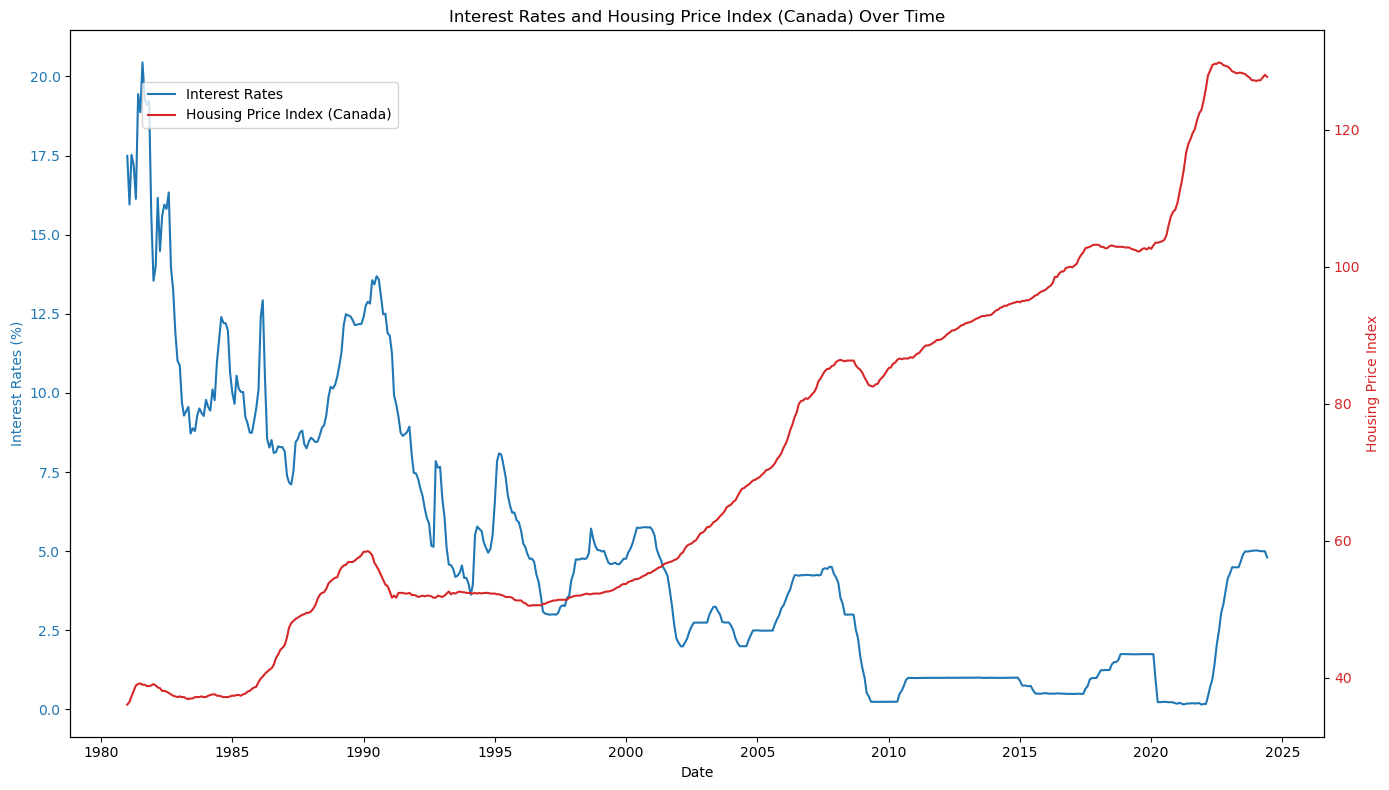

In [7]:
import matplotlib.pyplot as plt

# Convert 'Month-Year' to datetime format for better plotting
merged_df['Month-Year'] = pd.to_datetime(merged_df['Month-Year'])

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot interest rates
ax1.plot(merged_df['Month-Year'], merged_df['Overnight money market financing'], color='tab:blue', label='Interest Rates')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rates (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the housing index
ax2 = ax1.twinx()
ax2.plot(merged_df['Month-Year'], merged_df['Canada'], color='tab:red', label='Housing Price Index (Canada)')
ax2.set_ylabel('Housing Price Index', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding titles and legend
plt.title('Interest Rates and Housing Price Index (Canada) Over Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()
